#Comment_analysis using Sentiment Analysis 

#Some Import Important Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import random
random.randint(1,100)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


49

#Load The Data set

In [2]:
df = pd.read_csv("/content/drive/My Drive/comment Analysis.csv")

#Exploring the Data set

In [3]:
df.head()

,Comment
0,OMG i never Belive that i will be able to loss...
1,was not helpful to me thanks to @dr_wisdom_her...
2,"his herbs and roots he ship to me, which i dri..."
3,happiest creation on earth thanks to @dr_wisdo...
4,@plumbodylovin great giveaway lol... I was ski...


In [4]:
df.tail()

,Comment
152,This red lipstick looks beautiful on you
153,i will surely participate. you are looking stu...
154,I love the red shade
155,So beautiful neck pc. Style
156,Such a stunning pichaa


#Creating New Column

In [5]:
df["Label"] = ""

In [6]:
df.columns

Index(['Comment', 'Label'], dtype='object')

In [7]:
df.head()

,Comment,Label
0,OMG i never Belive that i will be able to loss...,
1,was not helpful to me thanks to @dr_wisdom_her...,
2,"his herbs and roots he ship to me, which i dri...",
3,happiest creation on earth thanks to @dr_wisdo...,
4,@plumbodylovin great giveaway lol... I was ski...,


In [8]:
df.isnull().sum()

Comment    0
Label      0
dtype: int64

In [9]:
df.shape

(157, 2)

#Data Cleaning

#Importing Essential libraries for performing NLP

In [10]:
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [11]:
#Cleaning the Comment Column
corpus = []
wnl = WordNetLemmatizer()

for Comment_string in list(df.Comment):
    #Cleaning special character from the Comment Column
    Comment = re.sub(pattern='[^a-zA-Z]', repl=' ', string=Comment_string)
    #Converting the entire Comment into lower case
    Comment = Comment.lower()
    #Tokanizing the Comment by words
    words = Comment.split()
    #Removing the stopwards 
    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]
    #Lemmatizing the words
    lemmatized_words = [wnl.lemmatize(word) for word in filtered_words]
    #Joining the lemmatized words
    Comment=' '.join(lemmatized_words)
    #Buliding the corpus of Comment column
    corpus.append(Comment)

In [12]:
corpus[:157]

['omg never belive able loss weight try several method going gym many thing',
 'helpful thanks dr wisdom herb made possible able loss weight use',
 'herb root ship drink one month weight return normal',
 'happiest creation earth thanks dr wisdom herb god bless forever love',
 'plumbodylovin great giveaway lol skinny back school cant even begin tell many taunt used',
 'receive khaati piti nai hai kya kuch like bruhhh annoying',
 'dont believe body shaming',
 'eve faced bodyshaming care plumgoodness',
 'wait till school day skinny bad phase',
 'checking plumbodylovin never body shamed victim colorism',
 'hv hving',
 'always find syrup cold cough tablet cofsils india bag',
 'needed weather',
 'really careful getting cough hell throat definitely check',
 'wat wanted father cofsils india',
 'drooling ovenstory pizza',
 'pizza long',
 'miss hving cheese burst pizza',
 'need pizza ovenstroy',
 'oh wow feeling hungry',
 'girl look bomb af',
 'omg want paryushan though',
 'awaiting video',
 'wo

#Creating Label Column from the Existing Data

In [13]:
Label = ['omg never belive able loss weight try several method going gym many thing',
 'helpful thanks dr wisdom herb made possible able loss weight use',
 'herb root ship drink one month weight return normal',
 'happiest creation earth thanks dr wisdom herb god bless forever love',
 'plumbodylovin great giveaway lol skinny back school cant even begin tell many taunt used',
 'receive khaati piti nai hai kya kuch like bruhhh annoying',
 'dont believe body shaming',
 'eve faced bodyshaming care plumgoodness',
 'wait till school day skinny bad phase',
 'checking plumbodylovin never body shamed victim colorism',
 'hv hving',
 'always find syrup cold cough tablet cofsils india bag',
 'needed weather',
 'really careful getting cough hell throat definitely check',
 'wat wanted father cofsils india',
 'drooling ovenstory pizza',
 'pizza long',
 'miss hving cheese burst pizza',
 'need pizza ovenstroy',
 'oh wow feeling hungry',
 'girl look bomb af',
 'omg want paryushan though',
 'awaiting video',
 'word pretty worthless without',
 'letecomers grassisgreeenish cocreateyourjourney iinstahash wed aug',
 'kri sha kindly check dm offer thank',
 'definitely check',
 'product seems promising one',
 'watch caught attention',
 'waiting video dear',
 'check collection gudindia red blue suit much',
 'definitely checking gudindia collection',
 'superb thought krisha',
 'always self love everything beautiful way sharing contest friend',
 'amazing giveaway',
 'like wow really amazing',
 'inspiring body beautiful',
 'girl experience totally agree word plumbodylovin hope win',
 'yes every body beautiful body',
 'wow one absolutely adorable',
 'definitely body loving amazing initiative plumbodylovin',
 'awesome initiative plumbodylovin family member commented thigh',
 'know thick thigh save life',
 'still facing fat shaming day okay love body kuddos plumbodylovin',
 'fat shammed life totally relate plumbodylovin',
 'thts amazing initiative plumbodylovin definitely participating',
 'cute need try th range',
 'always love',
 'definitely body loving always',
 'thats pretty amazing initiative plumbodylovin abt body shaming care people think kuch toh log kahenge',
 'logo ka kaam hai kehna',
 'product seems excellent one',
 'wow inspiring',
 'inspiring',
 'yusssss soooooo inspiring',
 'perspective good',
 'cofsils india really nice like',
 'cofsils india seems really helpful curing cough',
 'essential product hour cofsils india',
 'cofsils india saviour sure',
 'get one cofsils india',
 'cofsils india saviour sure',
 'thank sharing surely ordering',
 'cofsils india gargle must keep u protected changing weather health issue',
 'cofsils india always made feel better household staple',
 'thats one trusted',
 'cofsils india really amazing cough cold',
 'product look amazing try',
 'product look great try',
 'wow informative post',
 'post really informative',
 'cofsils india amazing product gargle',
 'cofsils india always savior',
 'already',
 'wow informative post',
 'forever love',
 'ovenstory fav pizza',
 'tempting',
 'wow look yum',
 'wow fabulous really like',
 'seems like yummy pizza',
 'wait order ovenstory',
 'amazing best pizza',
 'seems yumm would surely love',
 'love ordering ovenstory whenever want snack pizza',
 'ovenstory amazing cheesy pizzaaa',
 'pizza forever love',
 'ovenstory pizza favorite anyday',
 'pretty shot',
 'love styling babe',
 'hahah nice caption pic',
 'look pretty one',
 'beautiful shot',
 'hehe true look pretty',
 'wwoww fabulous',
 'stunning picture',
 'totally well',
 'aww u look incredibly cute',
 'thats pretty awesome shot love black zipper',
 'beautiful shot love editing',
 'relatable bte nice click',
 'love shot krisha amazing',
 'look perfect wing',
 'look really pretty absolutely loved top',
 'hahah caption perfectly sum capture',
 'relatable cute',
 'wow beautiful shot',
 'amazing post',
 'looking beautiful nice pic',
 'aww cute shot',
 'pretty love ur smile',
 'really like aesthetic',
 'amazing shot',
 'hehe cuteeeeeee',
 'beautiful babe',
 'pretty ya',
 'gorgeous look n stunning photography',
 'hey dear looking adorable',
 'beautiful shrug',
 'stunning whoaaaaa',
 'loved top wearing',
 'top look awesome',
 'love wearing gudindia',
 'waiting video excited',
 'top look lovely',
 'love top excited video',
 'nice shot look gorgeous',
 'amazing outfit looking fabbb',
 'looking beautiful always',
 'love colour combination gudindia',
 'outfit look beautiful',
 'awesome combo look beautiful',
 'dress cute gudindia',
 'love combo completely gudindia',
 'combo best looking lovely',
 'red time favorite look superb',
 'loving outfit gudindia',
 'look ravishing',
 'hey collaborate photo edits let know check work profile agree dm thank',
 'beautiful shade',
 'lakmeindia one favorite brand',
 'love pretty lippie',
 'wow lovely color lakmeindia',
 'love lipstick lakmeindia',
 'look fab red love lakmeindia',
 'lovely lipstick shade',
 'loving whole look lakmeindia',
 'lakmeindia red lipstick great picture',
 'love scarlet surge lip look amazing',
 'look pretty dear',
 'love picture',
 'love color lipstick',
 'red lipstick look beautiful',
 'surely participate looking stunning',
 'love red shade',
 'beautiful neck pc style',
 'stunning pichaa']

In [14]:
df['Label'] = Label

In [15]:
df.head()

,Comment,Label
0,OMG i never Belive that i will be able to loss...,omg never belive able loss weight try several ...
1,was not helpful to me thanks to @dr_wisdom_her...,helpful thanks dr wisdom herb made possible ab...
2,"his herbs and roots he ship to me, which i dri...",herb root ship drink one month weight return n...
3,happiest creation on earth thanks to @dr_wisdo...,happiest creation earth thanks dr wisdom herb ...
4,@plumbodylovin great giveaway lol... I was ski...,plumbodylovin great giveaway lol skinny back s...


#Creating Target Column from Existing Data

In [16]:
target = ['omg never belive able loss weight try several method going gym many thing',
 'helpful thanks dr wisdom herb made possible able loss weight use',
 'herb root ship drink one month weight return normal',
 'happiest creation earth thanks dr wisdom herb god bless forever love',
 'plumbodylovin great giveaway lol skinny back school cant even begin tell many taunt used',
 'receive khaati piti nai hai kya kuch like bruhhh annoying',
 'dont believe body shaming',
 'eve faced bodyshaming care plumgoodness',
 'wait till school day skinny bad phase',
 'checking plumbodylovin never body shamed victim colorism',
 'hv hving',
 'always find syrup cold cough tablet cofsils india bag',
 'needed weather',
 'really careful getting cough hell throat definitely check',
 'wat wanted father cofsils india',
 'drooling ovenstory pizza',
 'pizza long',
 'miss hving cheese burst pizza',
 'need pizza ovenstroy',
 'oh wow feeling hungry',
 'girl look bomb af',
 'omg want paryushan though',
 'awaiting video',
 'word pretty worthless without',
 'letecomers grassisgreeenish cocreateyourjourney iinstahash wed aug',
 'kri sha kindly check dm offer thank',
 'definitely check',
 'product seems promising one',
 'watch caught attention',
 'waiting video dear',
 'check collection gudindia red blue suit much',
 'definitely checking gudindia collection',
 'superb thought krisha',
 'always self love everything beautiful way sharing contest friend',
 'amazing giveaway',
 'like wow really amazing',
 'inspiring body beautiful',
 'girl experience totally agree word plumbodylovin hope win',
 'yes every body beautiful body',
 'wow one absolutely adorable',
 'definitely body loving amazing initiative plumbodylovin',
 'awesome initiative plumbodylovin family member commented thigh',
 'know thick thigh save life',
 'still facing fat shaming day okay love body kuddos plumbodylovin',
 'fat shammed life totally relate plumbodylovin',
 'thts amazing initiative plumbodylovin definitely participating',
 'cute need try th range',
 'always love',
 'definitely body loving always',
 'thats pretty amazing initiative plumbodylovin abt body shaming care people think kuch toh log kahenge',
 'logo ka kaam hai kehna',
 'product seems excellent one',
 'wow inspiring',
 'inspiring',
 'yusssss soooooo inspiring',
 'perspective good',
 'cofsils india really nice like',
 'cofsils india seems really helpful curing cough',
 'essential product hour cofsils india',
 'cofsils india saviour sure',
 'get one cofsils india',
 'cofsils india saviour sure',
 'thank sharing surely ordering',
 'cofsils india gargle must keep u protected changing weather health issue',
 'cofsils india always made feel better household staple',
 'thats one trusted',
 'cofsils india really amazing cough cold',
 'product look amazing try',
 'product look great try',
 'wow informative post',
 'post really informative',
 'cofsils india amazing product gargle',
 'cofsils india always savior',
 'already',
 'wow informative post',
 'forever love',
 'ovenstory fav pizza',
 'tempting',
 'wow look yum',
 'wow fabulous really like',
 'seems like yummy pizza',
 'wait order ovenstory',
 'amazing best pizza',
 'seems yumm would surely love',
 'love ordering ovenstory whenever want snack pizza',
 'ovenstory amazing cheesy pizzaaa',
 'pizza forever love',
 'ovenstory pizza favorite anyday',
 'pretty shot',
 'love styling babe',
 'hahah nice caption pic',
 'look pretty one',
 'beautiful shot',
 'hehe true look pretty',
 'wwoww fabulous',
 'stunning picture',
 'totally well',
 'aww u look incredibly cute',
 'thats pretty awesome shot love black zipper',
 'beautiful shot love editing',
 'relatable bte nice click',
 'love shot krisha amazing',
 'look perfect wing',
 'look really pretty absolutely loved top',
 'hahah caption perfectly sum capture',
 'relatable cute',
 'wow beautiful shot',
 'amazing post',
 'looking beautiful nice pic',
 'aww cute shot',
 'pretty love ur smile',
 'really like aesthetic',
 'amazing shot',
 'hehe cuteeeeeee',
 'beautiful babe',
 'pretty ya',
 'gorgeous look n stunning photography',
 'hey dear looking adorable',
 'beautiful shrug',
 'stunning whoaaaaa',
 'loved top wearing',
 'top look awesome',
 'love wearing gudindia',
 'waiting video excited',
 'top look lovely',
 'love top excited video',
 'nice shot look gorgeous',
 'amazing outfit looking fabbb',
 'looking beautiful always',
 'love colour combination gudindia',
 'outfit look beautiful',
 'awesome combo look beautiful',
 'dress cute gudindia',
 'love combo completely gudindia',
 'combo best looking lovely',
 'red time favorite look superb',
 'loving outfit gudindia',
 'look ravishing',
 'hey collaborate photo edits let know check work profile agree dm thank',
 'beautiful shade',
 'lakmeindia one favorite brand',
 'love pretty lippie',
 'wow lovely color lakmeindia',
 'love lipstick lakmeindia',
 'look fab red love lakmeindia',
 'lovely lipstick shade',
 'loving whole look lakmeindia',
 'lakmeindia red lipstick great picture',
 'love scarlet surge lip look amazing',
 'look pretty dear',
 'love picture',
 'love color lipstick',
 'red lipstick look beautiful',
 'surely participate looking stunning',
 'love red shade',
 'beautiful neck pc style',
 'stunning pichaa']

#Convert Target Column into numeric form

In [17]:
df['Target'] = target

In [18]:
dict = {'omg never belive able loss weight try several method going gym many thing':1,
 'helpful thanks dr wisdom herb made possible able loss weight use':1,
 'herb root ship drink one month weight return normal':1,
 'happiest creation earth thanks dr wisdom herb god bless forever love':1,
 'plumbodylovin great giveaway lol skinny back school cant even begin tell many taunt used':0,
 'receive khaati piti nai hai kya kuch like bruhhh annoying':1,
 'dont believe body shaming':1,
 'eve faced bodyshaming care plumgoodness':0,
 'wait till school day skinny bad phase':1,
 'checking plumbodylovin never body shamed victim colorism':0,
 'hv hving':1,
 'always find syrup cold cough tablet cofsils india bag':1,
 'needed weather':1,
 'really careful getting cough hell throat definitely check':1,
 'wat wanted father cofsils india':0,
 'drooling ovenstory pizza':1,
 'pizza long':1,
 'miss hving cheese burst pizza':1,
 'need pizza ovenstroy':1,
 'oh wow feeling hungry':1,
 'girl look bomb af':0,
 'omg want paryushan though':1,
 'awaiting video':1,
 'word pretty worthless without':1,
 'letecomers grassisgreeenish cocreateyourjourney iinstahash wed aug':0,
 'kri sha kindly check dm offer thank':1,
 'definitely check':1,
 'product seems promising one':1,
 'watch caught attention':0,
 'waiting video dear':1,
 'check collection gudindia red blue suit much':0,
 'definitely checking gudindia collection':1,
 'superb thought krisha':1,
 'always self love everything beautiful way sharing contest friend':1,
 'amazing giveaway':1,
 'like wow really amazing':1,
 'inspiring body beautiful':1,
 'girl experience totally agree word plumbodylovin hope win':1,
 'yes every body beautiful body':1,
 'wow one absolutely adorable':1,
 'definitely body loving amazing initiative plumbodylovin':1,
 'awesome initiative plumbodylovin family member commented thigh':0,
 'know thick thigh save life':1,
 'still facing fat shaming day okay love body kuddos plumbodylovin':1,
 'fat shammed life totally relate plumbodylovin':1,
 'thts amazing initiative plumbodylovin definitely participating':1,
 'cute need try th range':0,
 'always love':1,
 'definitely body loving always':1,
 'thats pretty amazing initiative plumbodylovin abt body shaming care people think kuch toh log kahenge':1,
 'logo ka kaam hai kehna':1,
 'product seems excellent one':1,
 'wow inspiring':1,
 'inspiring':1,
 'yusssss soooooo inspiring':1,
 'perspective good':1,
 'cofsils india really nice like':1,
 'cofsils india seems really helpful curing cough':0,
 'essential product hour cofsils india':1,
 'cofsils india saviour sure':0,
 'get one cofsils india':0,
 'cofsils india saviour sure':1,
 'thank sharing surely ordering':1,
 'cofsils india gargle must keep u protected changing weather health issue':0,
 'cofsils india always made feel better household staple':1,
 'thats one trusted':1,
 'cofsils india really amazing cough cold':0,
 'product look amazing try':1,
 'product look great try':1,
 'wow informative post':1,
 'post really informative':1,
 'cofsils india amazing product gargle':0,
 'cofsils india always savior':1,
 'already':1,
 'wow informative post':1,
 'forever love':1,
 'ovenstory fav pizza':1,
 'tempting':0,
 'wow look yum':1,
 'wow fabulous really like':1,
 'seems like yummy pizza':1,
 'wait order ovenstory':1,
 'amazing best pizza':1,
 'seems yumm would surely love':1,
 'love ordering ovenstory whenever want snack pizza':0,
 'ovenstory amazing cheesy pizzaaa':1,
 'pizza forever love':1,
 'ovenstory pizza favorite anyday':1,
 'pretty shot':1,
 'love styling babe':1,
 'hahah nice caption pic':1,
 'look pretty one':1,
 'beautiful shot':1,
 'hehe true look pretty':1,
 'wwoww fabulous':0,
 'stunning picture':1,
 'totally well':1,
 'aww u look incredibly cute':1,
 'thats pretty awesome shot love black zipper':1,
 'beautiful shot love editing':0,
 'relatable bte nice click':1,
 'love shot krisha amazing':1,
 'look perfect wing':1,
 'look really pretty absolutely loved top':1,
 'hahah caption perfectly sum capture':1,
 'relatable cute':1,
 'wow beautiful shot':1,
 'amazing post':1,
 'looking beautiful nice pic':1,
 'aww cute shot':1,
 'pretty love ur smile':1,
 'really like aesthetic':0,
 'amazing shot':1,
 'hehe cuteeeeeee':0,
 'beautiful babe':1,
 'pretty ya':1,
 'gorgeous look n stunning photography':1,
 'hey dear looking adorable':1,
 'beautiful shrug':1,
 'stunning whoaaaaa':1,
 'loved top wearing':1,
 'top look awesome':1,
 'love wearing gudindia':0,
 'waiting video excited':1,
 'top look lovely':1,
 'love top excited video':0,
 'nice shot look gorgeous':1,
 'amazing outfit looking fabbb':0,
 'looking beautiful always':1,
 'love colour combination gudindia':0,
 'outfit look beautiful':0,
 'awesome combo look beautiful':1,
 'dress cute gudindia':1,
 'love combo completely gudindia':1,
 'combo best looking lovely':1,
 'red time favorite look superb':1,
 'loving outfit gudindia':0,
 'look ravishing':0,
 'hey collaborate photo edits let know check work profile agree dm thank':0,
 'beautiful shade':1,
 'lakmeindia one favorite brand':0,
 'love pretty lippie':0,
 'wow lovely color lakmeindia':1,
 'love lipstick lakmeindia':0,
 'look fab red love lakmeindia':1,
 'lovely lipstick shade':0,
 'loving whole look lakmeindia':1,
 'lakmeindia red lipstick great picture':0,
 'love scarlet surge lip look amazing':1,
 'look pretty dear':1,
 'love picture':1,
 'love color lipstick':0,
 'red lipstick look beautiful':1,
 'surely participate looking stunning':0,
 'love red shade':0,
 'beautiful neck pc style':1,
 'stunning pichaa':1}
df.replace({'Target':dict},inplace=True)

#Consider Target Column is my Target.
#1 - is repersent the Positive Comment Message.
#0 - is repersent the Neegative Comment Message.

In [19]:
df.head()

,Comment,Label,Target
0,OMG i never Belive that i will be able to loss...,omg never belive able loss weight try several ...,1
1,was not helpful to me thanks to @dr_wisdom_her...,helpful thanks dr wisdom herb made possible ab...,1
2,"his herbs and roots he ship to me, which i dri...",herb root ship drink one month weight return n...,1
3,happiest creation on earth thanks to @dr_wisdo...,happiest creation earth thanks dr wisdom herb ...,1
4,@plumbodylovin great giveaway lol... I was ski...,plumbodylovin great giveaway lol skinny back s...,0


#Drop the column using pandas data frame

In [20]:
df.drop(['Comment'],axis=1,inplace=True)

In [21]:
df['Target'].value_counts()

1    120
0     37
Name: Target, dtype: int64

In [22]:
df.columns

Index(['Label', 'Target'], dtype='object')

In [23]:
df.dtypes

Label     object
Target     int64
dtype: object

# Importing essential libraries for performing NLP

In [24]:
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#Cleaning the Data 

In [25]:
#Cleaning the Label Column from existing the Data
corpus = []
wnl = WordNetLemmatizer()

for Label_string in list(df.Label):
    #Cleaning special character from the Label Column
    Label = re.sub(pattern='[^a-zA-Z]', repl=' ', string=Label_string)
    #Converting the entire Label into lower case
    Label = Label.lower()
    #Tokanizing the Label by words
    words = Label.split()
    #Removing the stopwards 
    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]
    #Lemmatizing the words
    lemmatized_words = [wnl.lemmatize(word) for word in filtered_words]
    #Joining the lemmatized words
    Comment=' '.join(lemmatized_words)
    #Buliding the corpus of Label column
    corpus.append(Label)

In [26]:
corpus[:5]

['omg never belive able loss weight try several method going gym many thing',
 'helpful thanks dr wisdom herb made possible able loss weight use',
 'herb root ship drink one month weight return normal',
 'happiest creation earth thanks dr wisdom herb god bless forever love',
 'plumbodylovin great giveaway lol skinny back school cant even begin tell many taunt used']

#Creating a Bag of Words using TfidfVectorizer

In [27]:
#Creating the Bag of words Model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=50)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names()

#Extracting the Independent and Dependant feature from the data set

In [28]:
#Extracting the Independent and Dependant feature from the data set
X = pd.DataFrame(vectors, columns=feature_names)
y = df['Target']

In [29]:
X.head()

,always,amazing,awesome,beautiful,body,check,cofsils,combo,cough,cute,dear,definitely,favorite,forever,great,gudindia,india,informative,initiative,inspiring,lakmeindia,like,lipstick,look,looking,love,lovely,loving,nice,one,ovenstory,picture,pizza,plumbodylovin,post,pretty,product,really,red,seems,shot,stunning,surely,thank,thats,top,totally,try,video,wow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.85442,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.519584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.779324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.626621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
y

0      1
1      1
2      1
3      1
4      0
      ..
152    1
153    0
154    0
155    1
156    1
Name: Target, Length: 157, dtype: int64

#Spliting the Data Set Using train_test_split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
training_x,test_x,training_y,test_y = train_test_split(X,y,test_size=0.1,random_state=42)

In [33]:
training_x.shape

(141, 50)

In [34]:
test_x.shape

(16, 50)

#Make Model

#Random Forest Classifier using GridSearchCV

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)

In [36]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [37]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(training_x, training_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [38]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [39]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

In [40]:
rfc1.fit(training_x, training_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [41]:
y_pred=rfc1.predict(test_x)

In [42]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(test_y,y_pred))

Accuracy for Random Forest on CV data:  0.6875


#Classification Report with Accuracy and Visulization Matrix

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.69      1.00      0.81        11

    accuracy                           0.69        16
   macro avg       0.34      0.50      0.41        16
weighted avg       0.47      0.69      0.56        16

###################################################
Accuracy Score of Random Forest Model


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6875

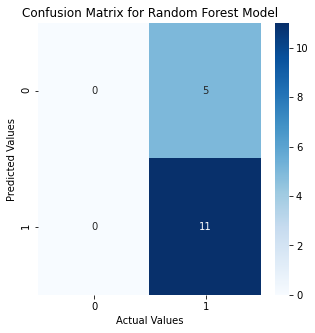

In [44]:
print(classification_report(test_y,y_pred))
print("###################################################")
#Confusion Matrix of Random Forest Model
cm = confusion_matrix(test_y,y_pred)
plt.figure(figsize=(5,5))
g = sns.heatmap(data=cm, annot=True, cmap='Blues')
p = plt.xlabel("Actual Values")
p = plt.ylabel("Predicted Values")
p = plt.title("Confusion Matrix for Random Forest Model")
print("Accuracy Score of Random Forest Model")
from sklearn.metrics import accuracy_score
accuracy_score(test_y,y_pred)

#Prediction using Random Forest Classifier

In [45]:
def predict_Label(sample_comment):
  sample_comment = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_comment)
  sample_comment = sample_comment.lower()
  sample_comment_words = sample_comment.split()
  sample_comment_words = [word for word in sample_comment_words if not word in set(stopwords.words('english'))]
  final_comment = [wnl.lemmatize(word) for word in sample_comment_words]
  final_comment = ' '.join(final_comment)

  temp = tfidf.transform([final_comment]).toarray()
  return rfc1.predict(temp)

In [46]:
# Prediction 1 - text Label
sample_comment = 'pretty love ur smile' #This is a positive Comment repersent by (1)
if predict_Label(sample_comment):
  print('Gotcha! This is a Positive Comment.')
else:
  print('This is a Negative Message')

Gotcha! This is a Positive Comment.


In [47]:
# Prediction 1 - text Label
sample_comment = 'love lipstick lakmeindia' #This is a negative Comment repersent by (0)

if predict_Label(sample_comment):
  print('Gotcha! This is a Positive Comment.')
else:
  print('This is a Negative Message')

This is a Negative Message
